## Different Reference Speech

In [2]:
import torch
from TTS.api import TTS

device = "cuda" if torch.cuda.is_available() else "cpu"
FreeVC = TTS("voice_conversion_models/multilingual/vctk/freevc24").to(device)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/coqpit/coqpit.py:864: UserWarning: Type mismatch in FreeVCConfig
Failed to deserialize field: test_sentences (list[str]) = [["It took me quite a long time to develop a voice, and now that I have it I'm not going to be silent."], ['Be a voice, not an echo.'], ["I'm sorry Dave. I'm afraid I can't do that."], ["This cake is great. It's so delicious and moist."], ['Prior to November 22, 1963.']]
Replaced it with field's default value: []
  self.deserialize(data)


In [3]:
# filepath variables
m1_fp = "good_outputs/M-1/AlanKay_2007-344.67-355.02-<o,f0,male>.wav"
m2_fp = "good_outputs/M-2/AdamSavage_2008P-641.94-652.45-<o,f0,male>.wav"
f1_fp = "good_outputs/F-1/BarbaraBlock_2010Z-1035.88-1046.06-<o,f0,female>.wav"
f2_fp = "good_outputs/F-2/AimeeMullins_1998-186.79-197.43-<o,f0,female>.wav"
obama_ref = "good_outputs/Obama/obama_output_fishspeech.wav"
trump_ref = "good_outputs/Trump/trump_output_fishspeech.wav"

### Obama

In [4]:
FreeVC.voice_conversion_to_file(
        source_wav=obama_ref,
        target_wav=m1_fp,
        file_path="good_outputs/Obama/obama_to_m1.wav"
)

'good_outputs/Obama/obama_to_m1.wav'

In [5]:
FreeVC.voice_conversion_to_file(
    source_wav=obama_ref,
    target_wav=m2_fp,
    file_path="good_outputs/Obama/obama_to_m2.wav"
)

'good_outputs/Obama/obama_to_m2.wav'

In [6]:
FreeVC.voice_conversion_to_file(
    source_wav=obama_ref,
    target_wav=f1_fp,
    file_path="good_outputs/Obama/obama_to_f1.wav"
)

'good_outputs/Obama/obama_to_f1.wav'

In [7]:
FreeVC.voice_conversion_to_file(
    source_wav=obama_ref,
    target_wav=f2_fp,
    file_path="good_outputs/Obama/obama_to_f2.wav"
)

'good_outputs/Obama/obama_to_f2.wav'

### Trump

In [8]:
FreeVC.voice_conversion_to_file(
    source_wav=trump_ref,
    target_wav=m1_fp,
    file_path="good_outputs/Trump/trump_to_m1.wav"
)

'good_outputs/Trump/trump_to_m1.wav'

In [4]:
FreeVC.voice_conversion_to_file(
    source_wav=trump_ref,
    target_wav=m2_fp,
    file_path="good_outputs/Trump/trump_to_m2.wav"
)

'good_outputs/Trump/trump_to_m2.wav'

In [5]:
FreeVC.voice_conversion_to_file(
    source_wav=trump_ref,
    target_wav=f1_fp,
    file_path="good_outputs/Trump/trump_to_f1.wav"
)

'good_outputs/Trump/trump_to_f1.wav'

In [6]:
FreeVC.voice_conversion_to_file(
    source_wav=trump_ref,
    target_wav=f2_fp,
    file_path="good_outputs/Trump/trump_to_f2.wav"
)

'good_outputs/Trump/trump_to_f2.wav'

## Same Reference Speech

In [7]:
m2_fp = "good_outputs/M-2/Adam_Savage_M2.mp3"

### Obama

In [9]:
FreeVC.voice_conversion_to_file(
    source_wav=obama_ref,
    target_wav=m2_fp,
    file_path="good_outputs/Obama/obama_to_m2_same.wav"
)

'good_outputs/Obama/obama_to_m2_same.wav'

## Prosody Analysis

In [2]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
def estimate_frequencies(filepath, title):
    y, sr = librosa.load(filepath)
    f0s = librosa.yin(y, sr=sr, fmin=60, fmax=280)
    fig, ax = plt.subplots()
    ax.plot(f0s, ".")
    ax.set_title(title)
    ax.set_ylabel("Fundamental Frequency (F0)")
    ax.set_xlabel("Frame")
    ax.set_ylim((90, 200))
    plt.show()
    return f0s

In [3]:
def print_statistics(f0s):
    mean = np.mean(f0s)
    std = np.std(f0s)
    cv = std/mean
    range = np.max(f0s)-np.min(f0s)
    print("Mean:", mean)   
    print("Standard Deviation:", std)
    print("Coefficient of Variation (CV):", cv)
    print("Range:", range)

In [4]:
def plot_delta_statistics(f0_first, f0_second, title):
    delta_mean = np.mean(f0_first) - np.mean(f0_second)
    delta_std = abs(np.std(f0_first) - np.std(f0_second))
    r_first = np.max(f0_first) - np.min(f0_first)
    r_second = np.max(f0_second) - np.min(f0_second)
    delta_range = abs(r_first - r_second)
    fig, ax = plt.subplots()
    bar = ax.bar(["$\\Delta$ mean f0", "$\\Delta$ std f0", "$\\Delta$ range f0"], [delta_mean, delta_std, delta_range])
    ax.bar_label(bar, fmt="%.2f")
    ax.set_title(title)
    
    plt.show()

## Obama

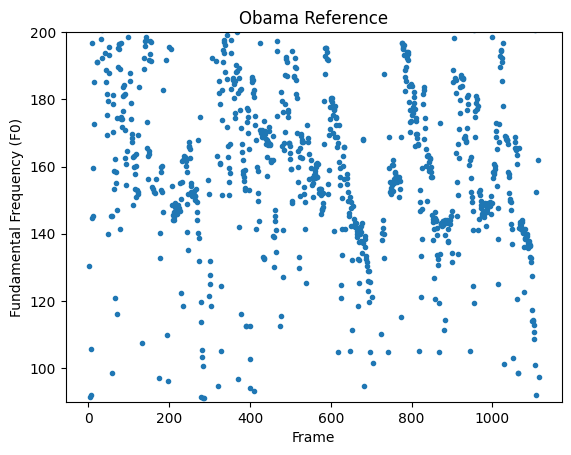

Mean: 161.40646188666915
Standard Deviation: 39.90226403411024
Coefficient of Variation (CV): 0.24721602572595539
Range: 222.5820284199795


In [95]:
obama_bf_f0s = estimate_frequencies("good_outputs/Obama/obama_output_fishspeech.wav", "Obama Reference")
print_statistics(obama_bf_f0s)

### FreeVC

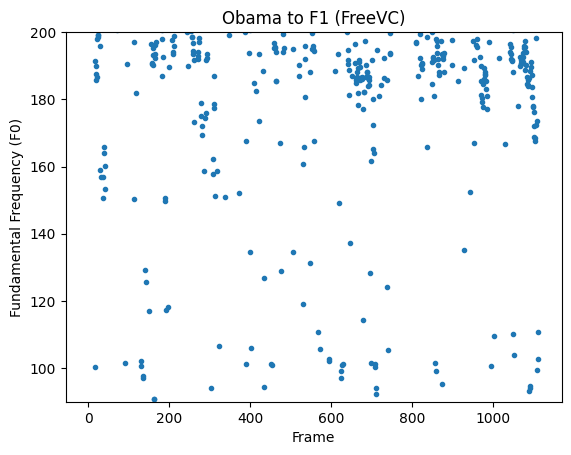

Mean: 206.95750399017783
Standard Deviation: 55.029034570217945
Coefficient of Variation (CV): 0.2658953336276689
Range: 222.77382943143812


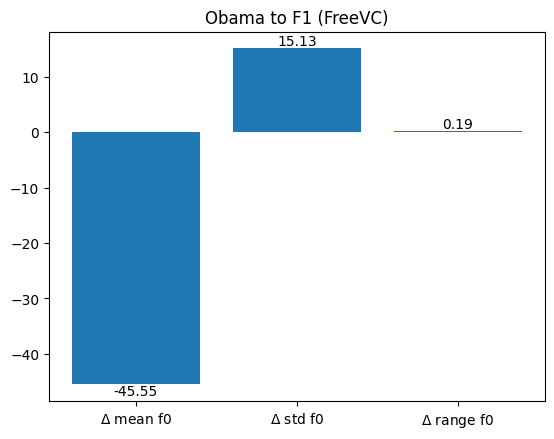

In [98]:
obama_to_f1_f0s = estimate_frequencies("good_outputs/Obama/FreeVC/obama_to_f1.wav", "Obama to F1 (FreeVC)")
print_statistics(obama_to_f1_f0s)
plot_delta_statistics(obama_bf_f0s, obama_to_f1_f0s, "Obama to F1 (FreeVC)")

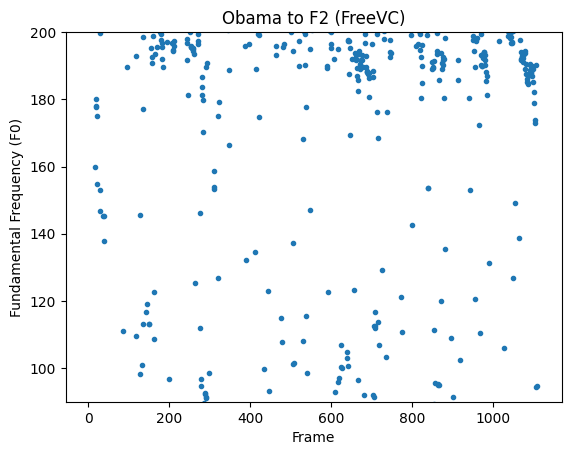

Mean: 203.63888967707558
Standard Deviation: 52.840973984858536
Coefficient of Variation (CV): 0.2594837070102482
Range: 222.77382943143812


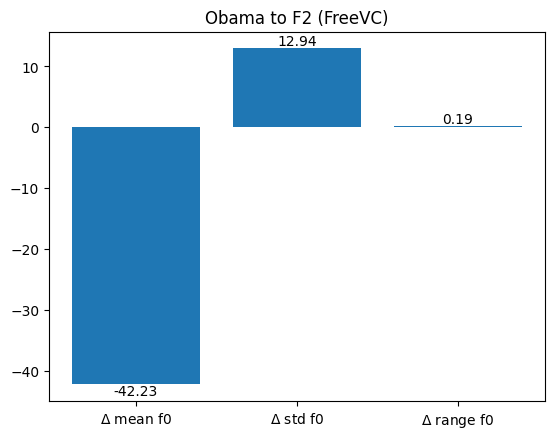

In [99]:
obama_to_f2_f0s = estimate_frequencies("good_outputs/Obama/FreeVC/obama_to_f2.wav", "Obama to F2 (FreeVC)")
print_statistics(obama_to_f2_f0s)
plot_delta_statistics(obama_bf_f0s, obama_to_f2_f0s, "Obama to F2 (FreeVC)")

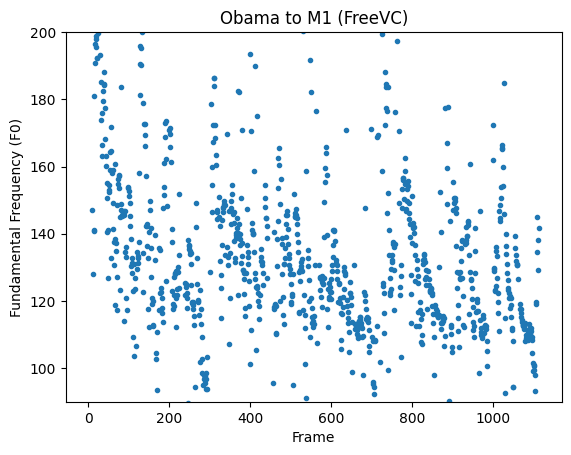

Mean: 138.654152167211
Standard Deviation: 46.18932111628796
Coefficient of Variation (CV): 0.3331261299739917
Range: 222.77382943143812


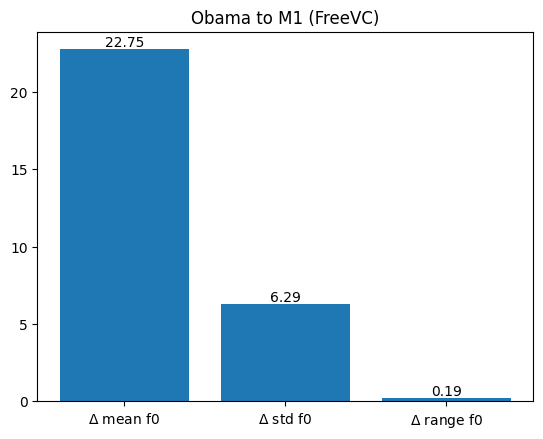

In [100]:
obama_to_m1_f0s = estimate_frequencies("good_outputs/Obama/FreeVC/obama_to_m1.wav", "Obama to M1 (FreeVC)")
print_statistics(obama_to_m1_f0s)
plot_delta_statistics(obama_bf_f0s, obama_to_m1_f0s, "Obama to M1 (FreeVC)")

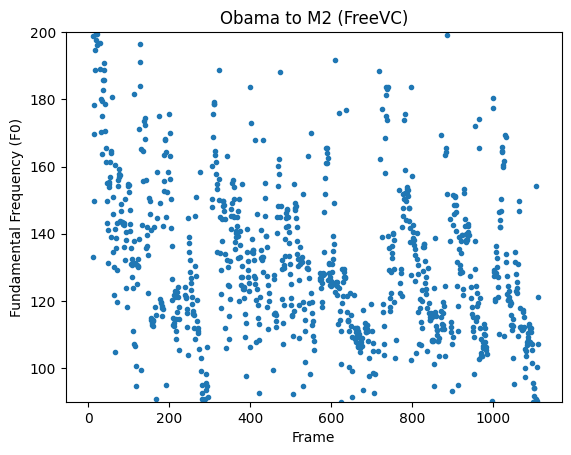

Mean: 135.67175308561215
Standard Deviation: 45.364030880290365
Coefficient of Variation (CV): 0.33436606993398665
Range: 222.77382943143812


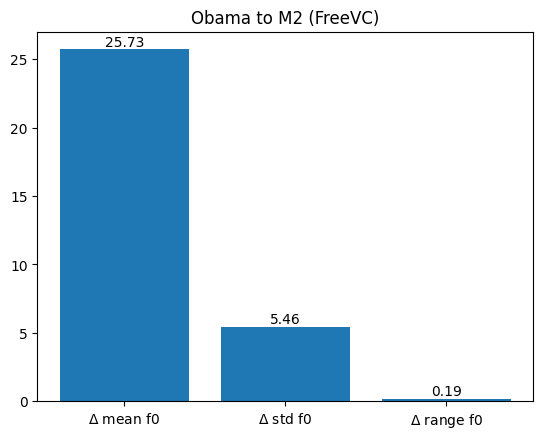

In [101]:
obama_to_m2_f0s = estimate_frequencies("good_outputs/Obama/FreeVC/obama_to_m2.wav", "Obama to M2 (FreeVC)")
print_statistics(obama_to_m2_f0s)
plot_delta_statistics(obama_bf_f0s, obama_to_m2_f0s, "Obama to M2 (FreeVC)")

### streamVC

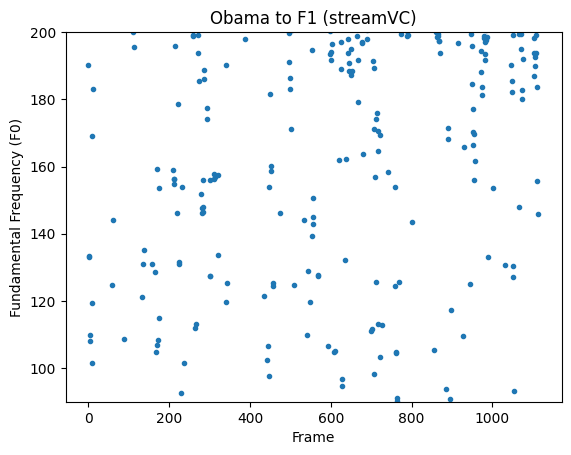

Mean: 205.31150215799616
Standard Deviation: 58.35792849637122
Coefficient of Variation (CV): 0.2842409114101277
Range: 222.77382943143812


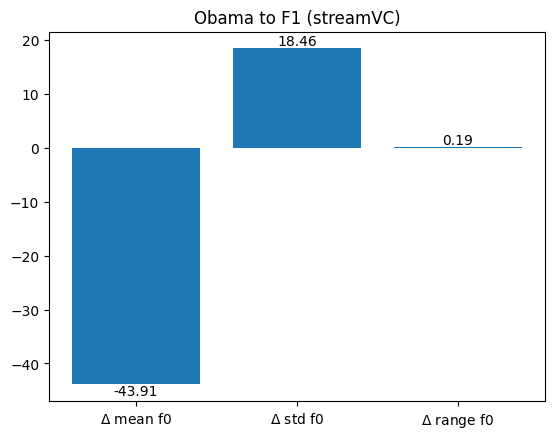

In [102]:
obama_to_f1_f0s = estimate_frequencies("good_outputs/Obama/streamVC/obama_to_f1.wav", "Obama to F1 (streamVC)")
print_statistics(obama_to_f1_f0s)
plot_delta_statistics(obama_bf_f0s, obama_to_f1_f0s, "Obama to F1 (streamVC)")

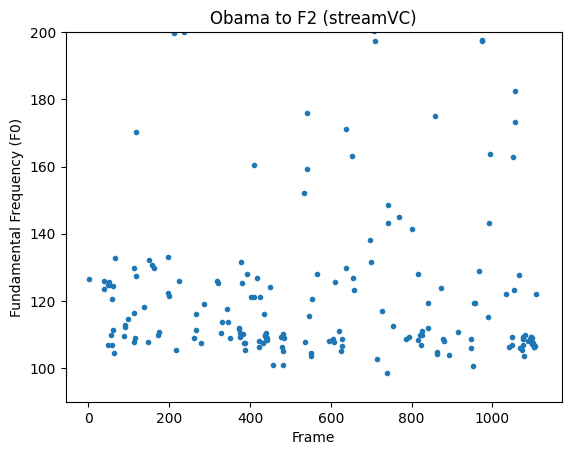

Mean: 180.08962703897376
Standard Deviation: 75.65283272637281
Coefficient of Variation (CV): 0.42008434339197415
Range: 222.77382943143812


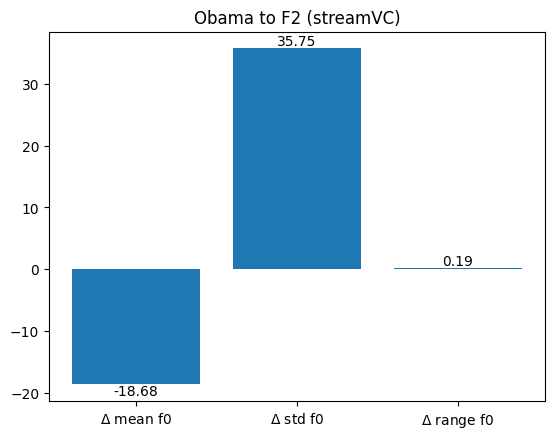

In [103]:
obama_to_f2_f0s = estimate_frequencies("good_outputs/Obama/streamVC/obama_to_f2.wav", "Obama to F2 (streamVC)")
print_statistics(obama_to_f2_f0s)
plot_delta_statistics(obama_bf_f0s, obama_to_f2_f0s, "Obama to F2 (streamVC)")

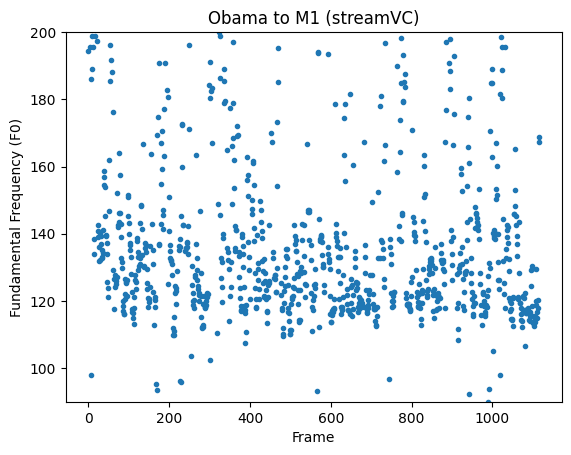

Mean: 140.94233025832676
Standard Deviation: 42.37578515735704
Coefficient of Variation (CV): 0.30066045509314626
Range: 222.77382943143812


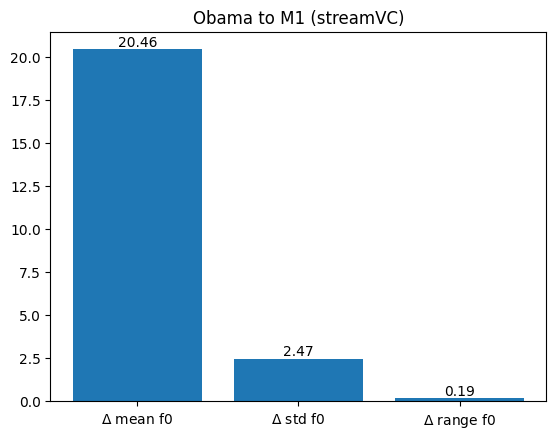

In [104]:
obama_to_m1_f0s = estimate_frequencies("good_outputs/Obama/streamVC/obama_to_m1.wav", "Obama to M1 (streamVC)")
print_statistics(obama_to_m1_f0s)
plot_delta_statistics(obama_bf_f0s, obama_to_m1_f0s, "Obama to M1 (streamVC)")

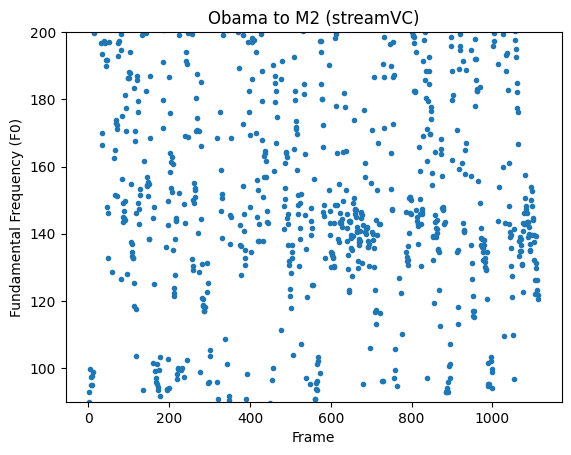

Mean: 157.1571204017504
Standard Deviation: 50.262919152723946
Coefficient of Variation (CV): 0.3198259106824671
Range: 222.77382943143812


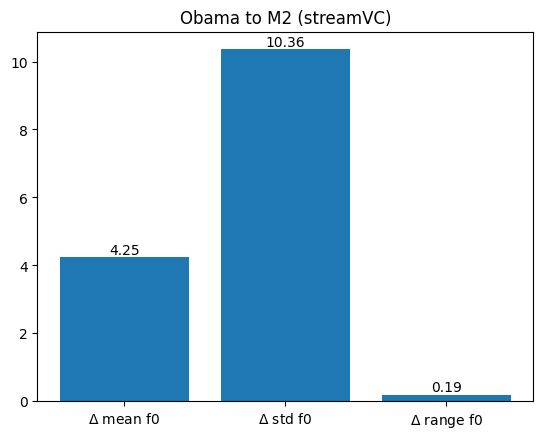

In [105]:
obama_to_m2_f0s = estimate_frequencies("good_outputs/Obama/streamVC/obama_to_m2.wav", "Obama to M2 (streamVC)")
print_statistics(obama_to_m2_f0s)
plot_delta_statistics(obama_bf_f0s, obama_to_m2_f0s, "Obama to M2 (streamVC)")

## Trump

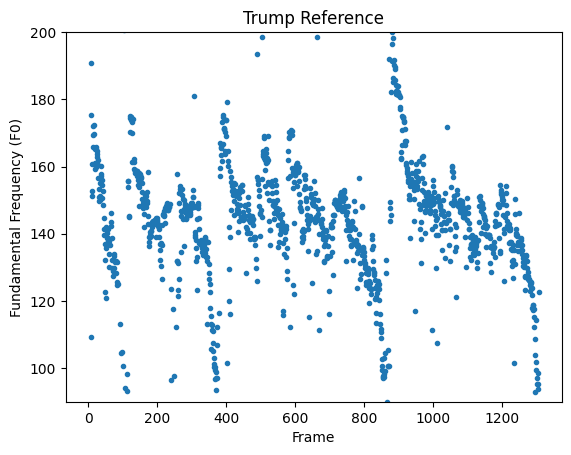

Mean: 139.5311149669722
Standard Deviation: 28.131833241388833
Coefficient of Variation (CV): 0.2016169171159264
Range: 222.77382943143812


In [6]:
trump_bf_f0s = estimate_frequencies("good_outputs/Trump/trump_output_fishspeech.wav", "Trump Reference")
print_statistics(trump_bf_f0s)

### FreeVC

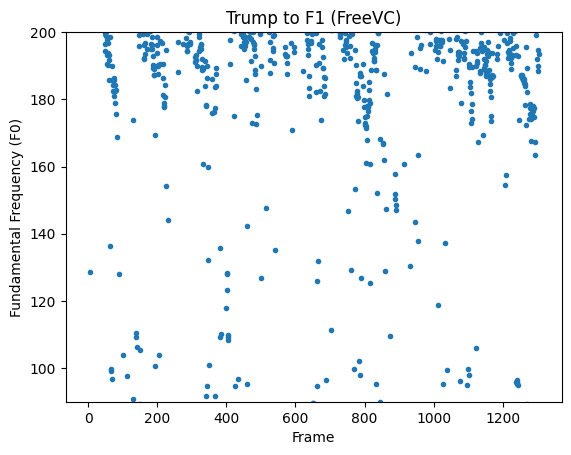

Mean: 192.37841494182211
Standard Deviation: 54.89181241400345
Coefficient of Variation (CV): 0.2853324913327906
Range: 222.77382943143812


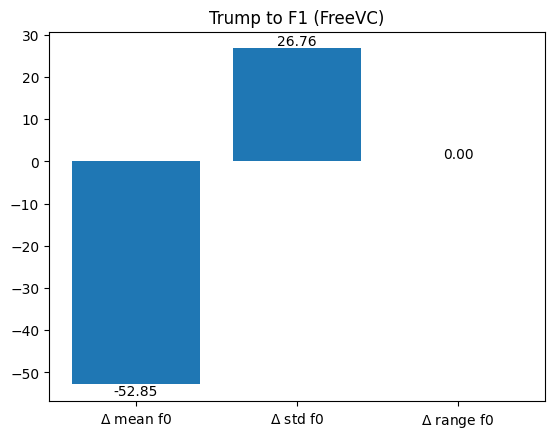

In [8]:
trump_to_f1_f0s = estimate_frequencies("good_outputs/Trump/FreeVC/trump_to_f1.wav", "Trump to F1 (FreeVC)")
print_statistics(trump_to_f1_f0s)
plot_delta_statistics(trump_bf_f0s, trump_to_f1_f0s, "Trump to F1 (FreeVC)")

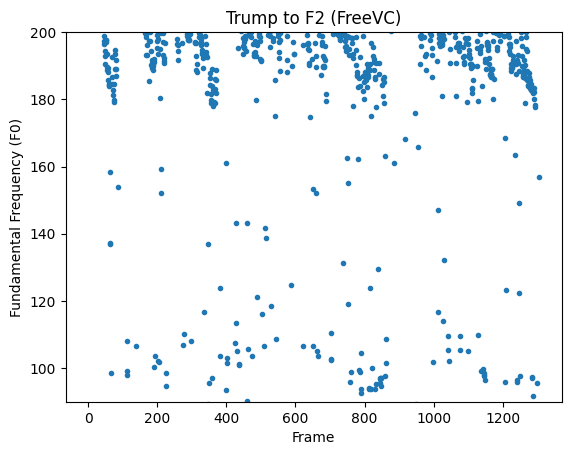

Mean: 194.30375586755042
Standard Deviation: 51.76084952449181
Coefficient of Variation (CV): 0.2663913998645257
Range: 222.77382943143812


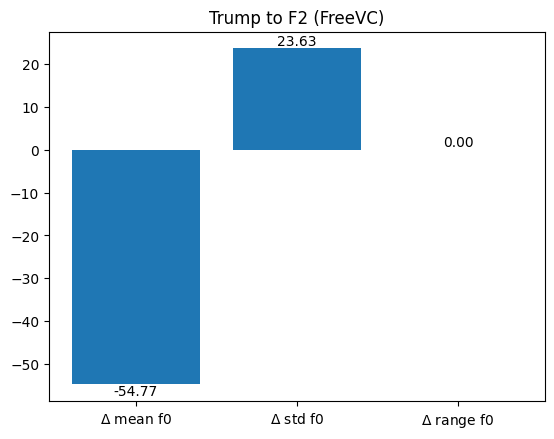

In [9]:
trump_to_f2_f0s = estimate_frequencies("good_outputs/Trump/FreeVC/trump_to_f2.wav", "Trump to F2 (FreeVC)")
print_statistics(trump_to_f2_f0s)
plot_delta_statistics(trump_bf_f0s, trump_to_f2_f0s, "Trump to F2 (FreeVC)")

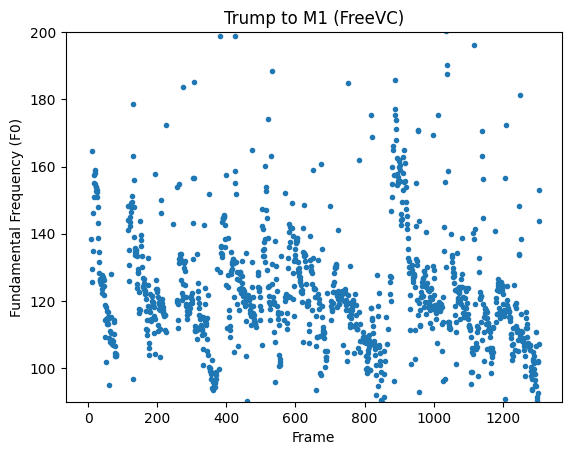

Mean: 126.90269437742616
Standard Deviation: 42.351354208919766
Coefficient of Variation (CV): 0.333730929959304
Range: 222.77382943143812


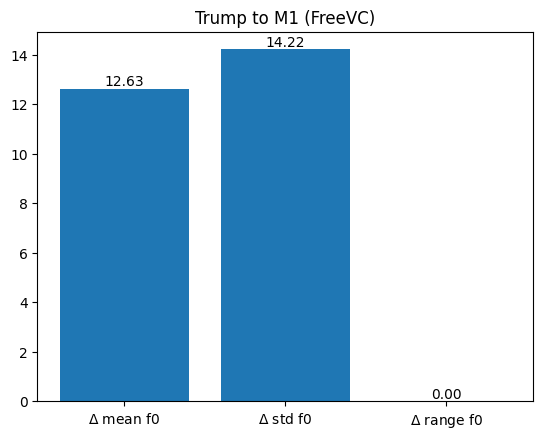

In [10]:
trump_to_m1_f0s = estimate_frequencies("good_outputs/Trump/FreeVC/trump_to_m1.wav", "Trump to M1 (FreeVC)")
print_statistics(trump_to_m1_f0s)
plot_delta_statistics(trump_bf_f0s, trump_to_m1_f0s, "Trump to M1 (FreeVC)")

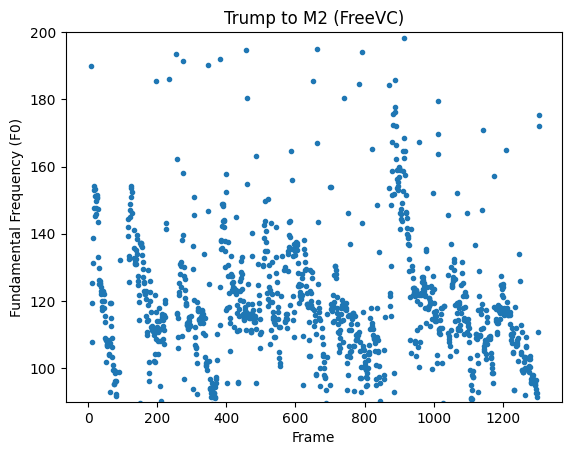

Mean: 125.48452548540894
Standard Deviation: 44.442642142231406
Coefficient of Variation (CV): 0.3541683085648604
Range: 222.77382943143812


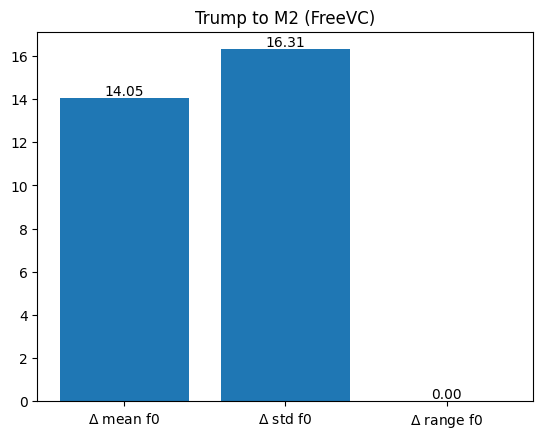

In [12]:
trump_to_m2_f0s = estimate_frequencies("good_outputs/Trump/FreeVC/trump_to_m2.wav", "Trump to M2 (FreeVC)")
print_statistics(trump_to_m2_f0s)
plot_delta_statistics(trump_bf_f0s, trump_to_m2_f0s, "Trump to M2 (FreeVC)")

### streamVC